In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('dark_background')





In [5]:
df = pd.read_csv("D:\\Python basics - Copy\\zomato.csv")
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [6]:
df = df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'] , axis=1)
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


dropping duplicates

In [8]:
df.drop_duplicates( inplace= True)
df.shape

(51609, 11)

fixing the rate colomn 

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def handlerate (value):
    if (value =='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')[0]
        return float(value)
    
df ['rate'] = df['rate'].apply(handlerate)
df['rate'].head()    

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
df.rate.isnull().sum()

np.int64(10019)

filling null values with mean in colomn operations 

In [12]:
df['rate'].fillna(df['rate'].mean() ,inplace= True)
df['rate'].isnull().sum()


C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\2481920447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean() ,inplace= True)


np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


still there are so many null values we decided drop all null values

In [14]:
df.dropna(inplace= True)
df.head(4)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari


In [15]:
df['rate'].isnull().sum()

np.int64(0)

In [16]:
df.shape

(51042, 11)

some colom has a such big name so we have to reduced it 

In [17]:
df.rename(columns= {'approx_cost(for two people)' : 'cost2plates', 'listed_in(type)': 'Type'},inplace = True)
df.head(4)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari


In [18]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [19]:
location = df ['location'].value_counts(ascending= False)
location_lessthan300 = location[location<300]


def handle_loation ( value):
    if (value in location_lessthan300):
        return 'others'
    else:
        return value
    
df['location'] =df['location'].apply(handle_loation)
df['location'].value_counts()    
    

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [20]:
df.head(4)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari


cleaning cuisine colomn

In [21]:
cuisines =df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100 = cuisines[cuisines<100]


def handle_cuisines (value):
    if value in cuisines_lessthan100:
        return 'others'
    else:
        return value
    
df['cuisines'] =df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()
 

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [22]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet,Banashankari


In [23]:
df['Type'].value_counts()


Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

Data is Clean, Lets jump to visualization 

Count plot of various locations 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'L

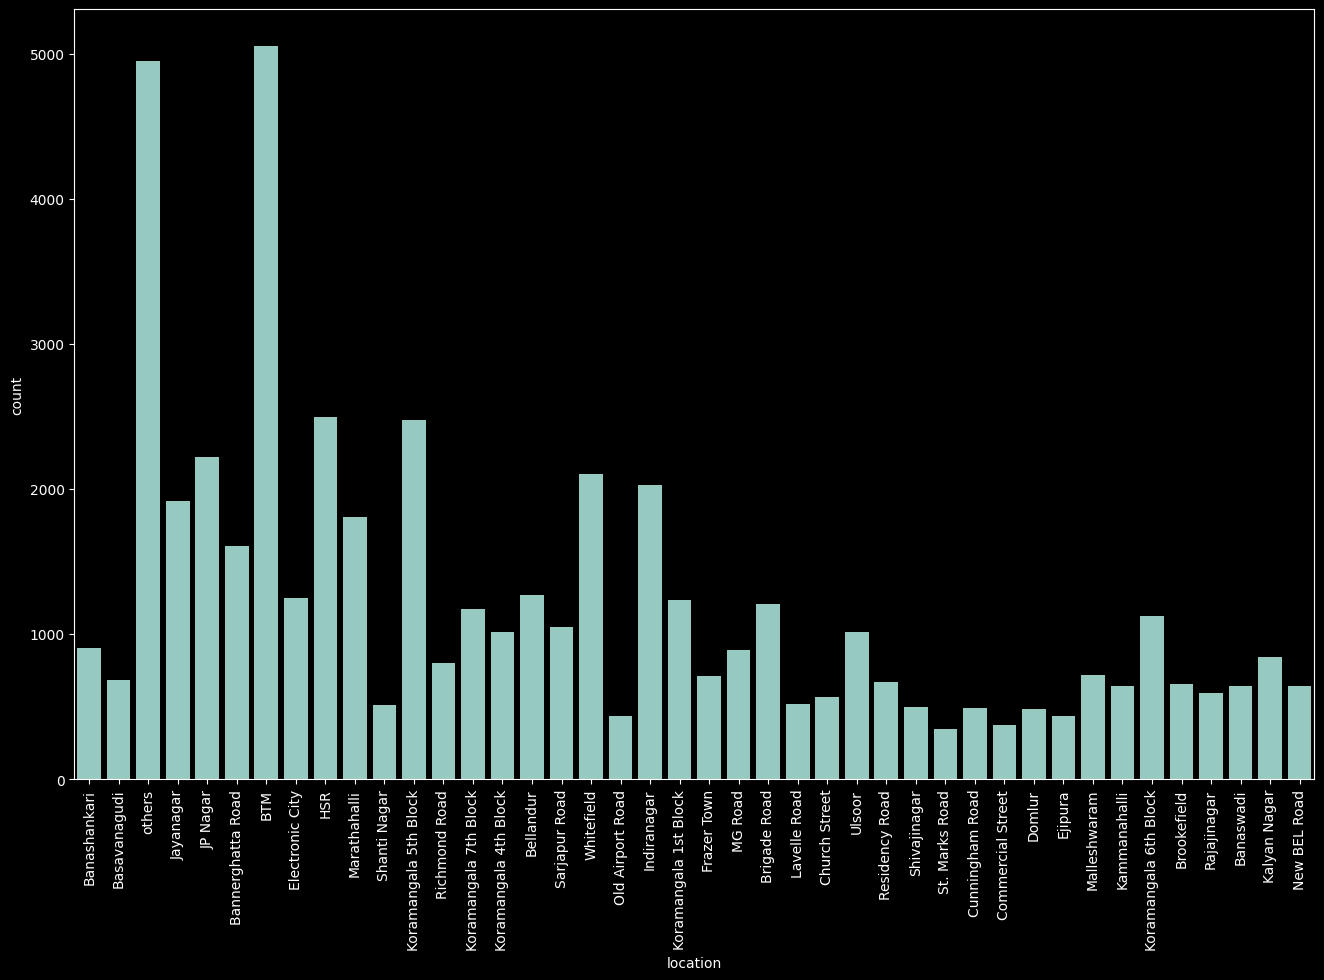

In [24]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x=df['location'])
plt.xticks(rotation = 90)


visualizing online order

C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\2396065502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette= 'inferno')


<Axes: xlabel='online_order', ylabel='count'>

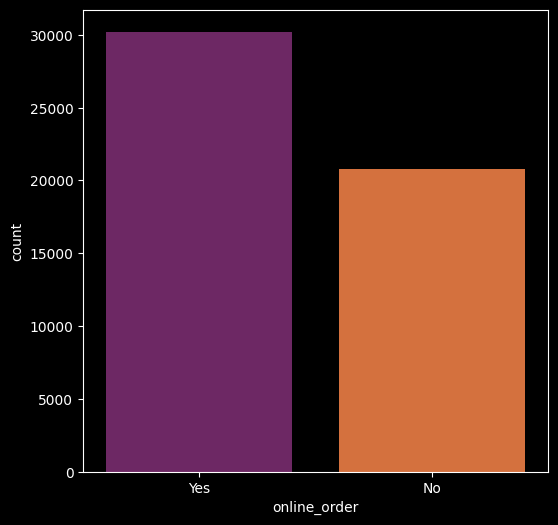

In [25]:
plt.figure ( figsize= (6,6))
sns.countplot(x=df['online_order'],palette= 'inferno')


visualizing book table

C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\1677545688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['book_table'], palette='deep' )


<Axes: xlabel='book_table', ylabel='count'>

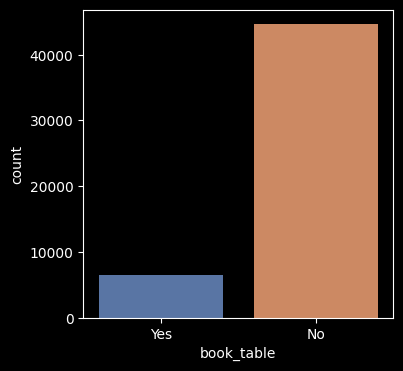

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x = df['book_table'], palette='deep' )

Visualizing Online order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

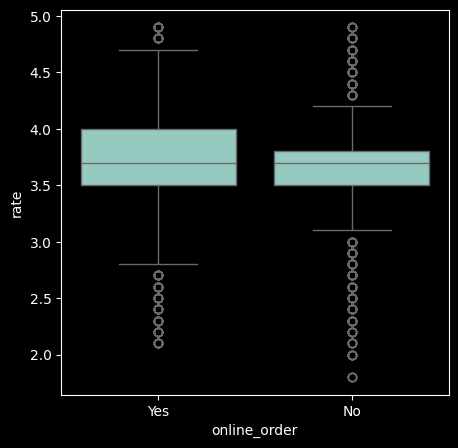

In [27]:
plt.figure(figsize = (5,5))
sns.boxplot( x ='online_order', y= 'rate',data=df)

visualizing book table vs rate 

<Axes: xlabel='book_table', ylabel='rate'>

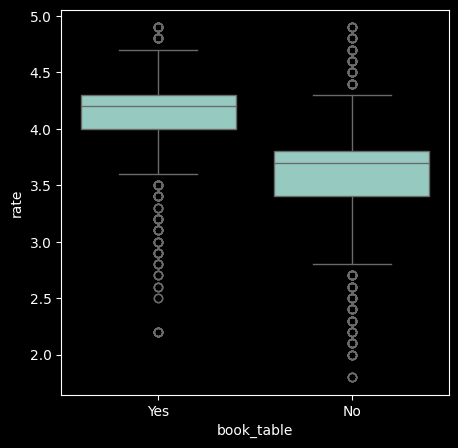

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot( x= 'book_table', y = 'rate', data=df )

visualizing Online order facility , location wise 

In [29]:
df1 = df.groupby(['location','online_order'] )['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1,  values=None, index =['location'],columns=['online_order'] ,fill_value=0, aggfunc=np.sum )
df1

C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\448558990.py:4: FutureWarning: The provided callable <function sum at 0x000002695033E0C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1,  values=None, index =['location'],columns=['online_order'] ,fill_value=0, aggfunc=np.sum )


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

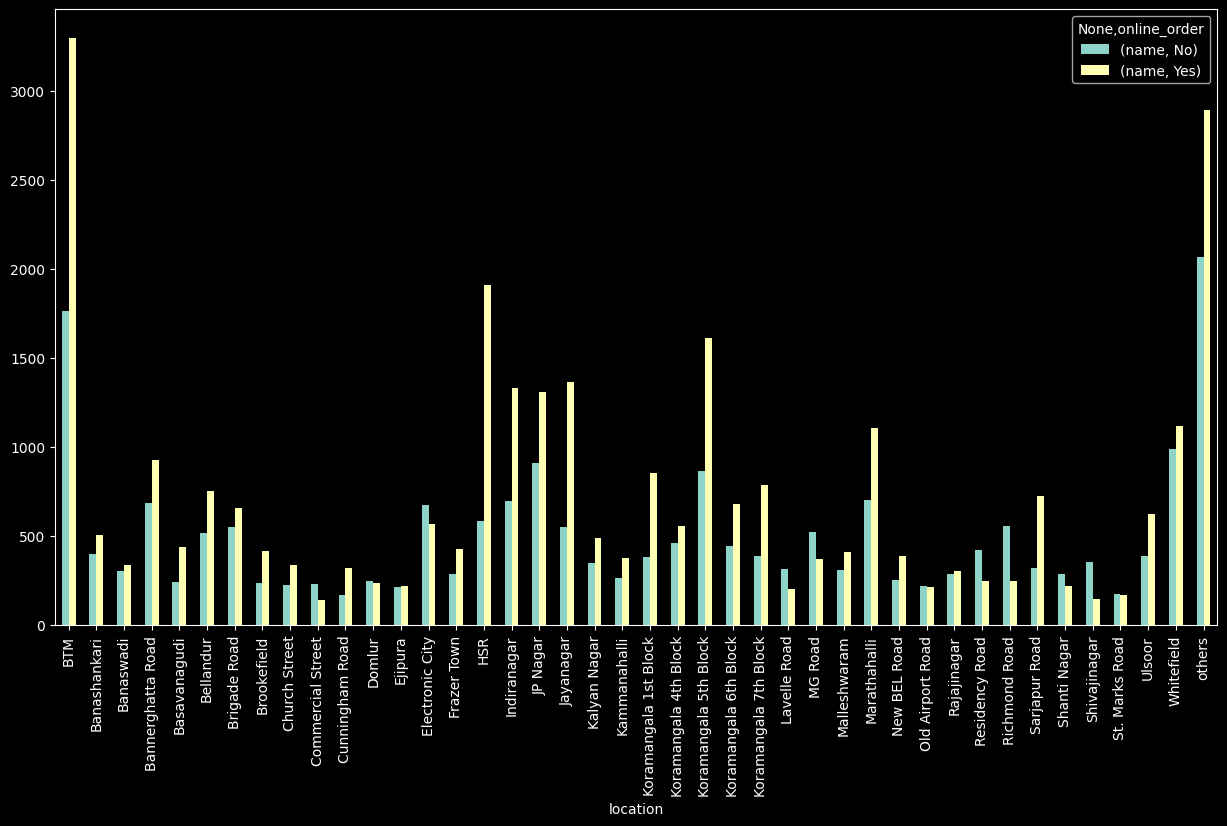

In [30]:
df1.plot(kind= 'bar',figsize=(15,8))

visualizing the book table facility , location wise 

In [31]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv("location_booktable.csv")
df2 = pd.pivot_table(df2 , values=None, index= ['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum )
df2

C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\1779001927.py:4: FutureWarning: The provided callable <function sum at 0x000002695033E0C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2 , values=None, index= ['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum )


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

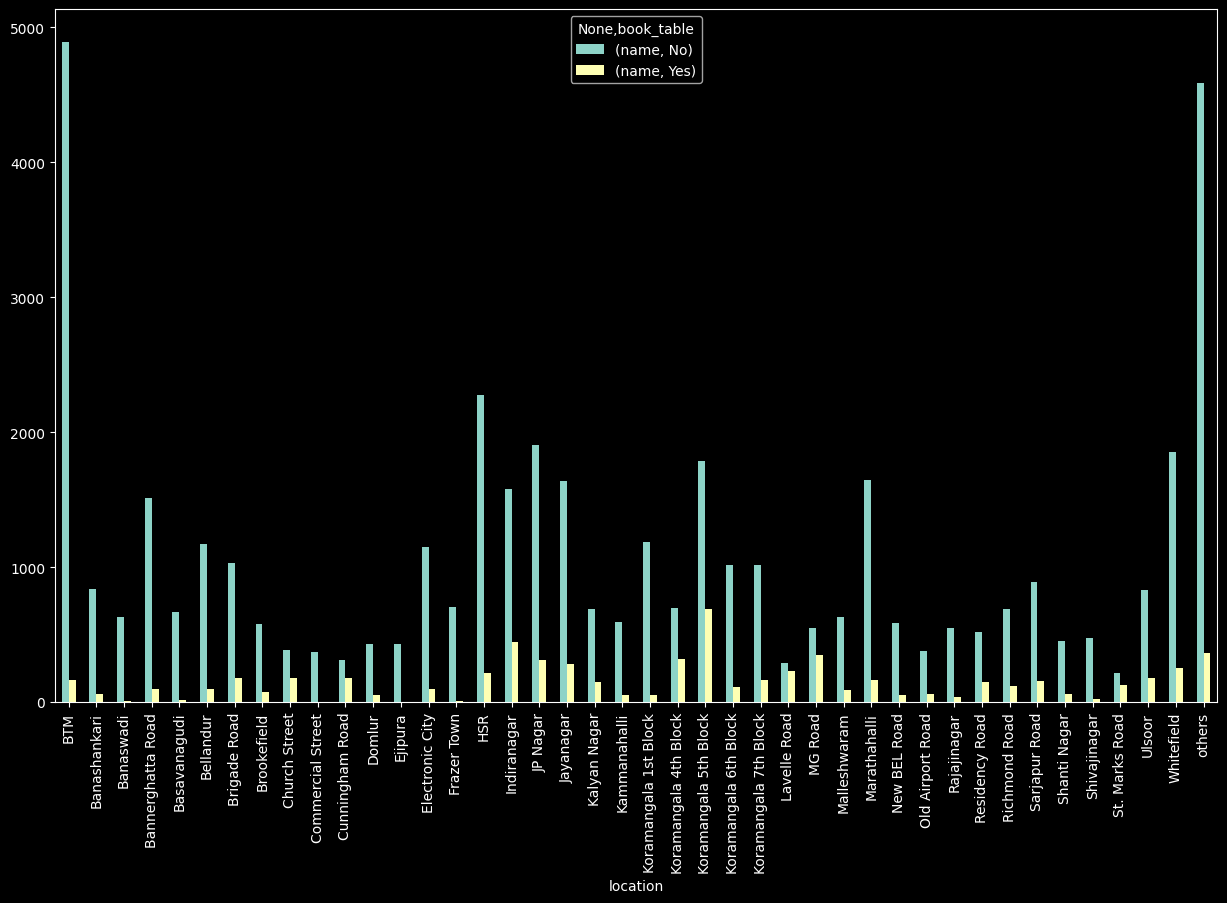

In [32]:
df2.plot(kind= 'bar',figsize=(15,9))

visualizing types of restaurents VS rate

C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\1340888774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x ='Type',y='rate' ,data = df ,palette= 'inferno')


<Axes: xlabel='Type', ylabel='rate'>

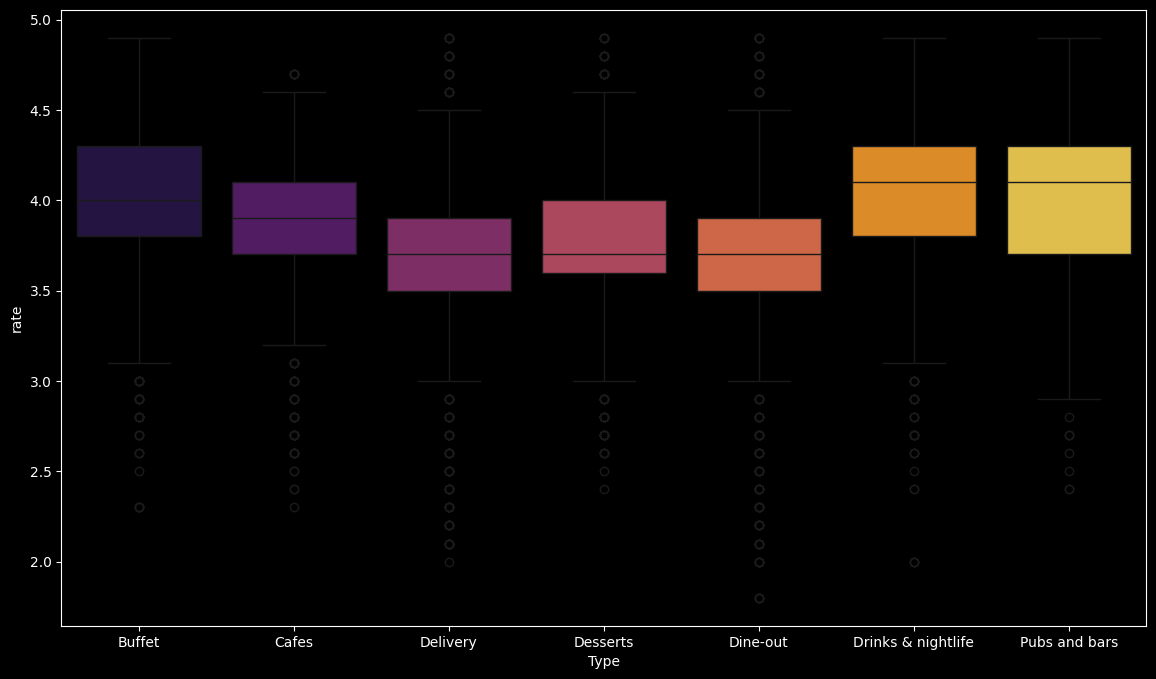

In [33]:
plt.figure(figsize=(14,8))
sns.boxplot( x ='Type',y='rate' ,data = df ,palette= 'inferno')


***grouping types of restaurents , locations wise***

In [34]:
df3 = df.groupby(['location','Type'] )['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3,  values=None, index =['location'],columns=['Type'] ,fill_value=0, aggfunc=np.sum)
df3.head(2)

C:\Users\Saurav\AppData\Local\Temp\ipykernel_20628\2351256189.py:4: FutureWarning: The provided callable <function sum at 0x000002695033E0C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3,  values=None, index =['location'],columns=['Type'] ,fill_value=0, aggfunc=np.sum)


name                                                      \
Type         Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                  
BTM              21    83     3053      198     1660                 22   
Banashankari      7    36      418       71      356                 14   

                            
Type         Pubs and bars  
location                    
BTM                     19  
Banashankari             0

<Axes: xlabel='location'>

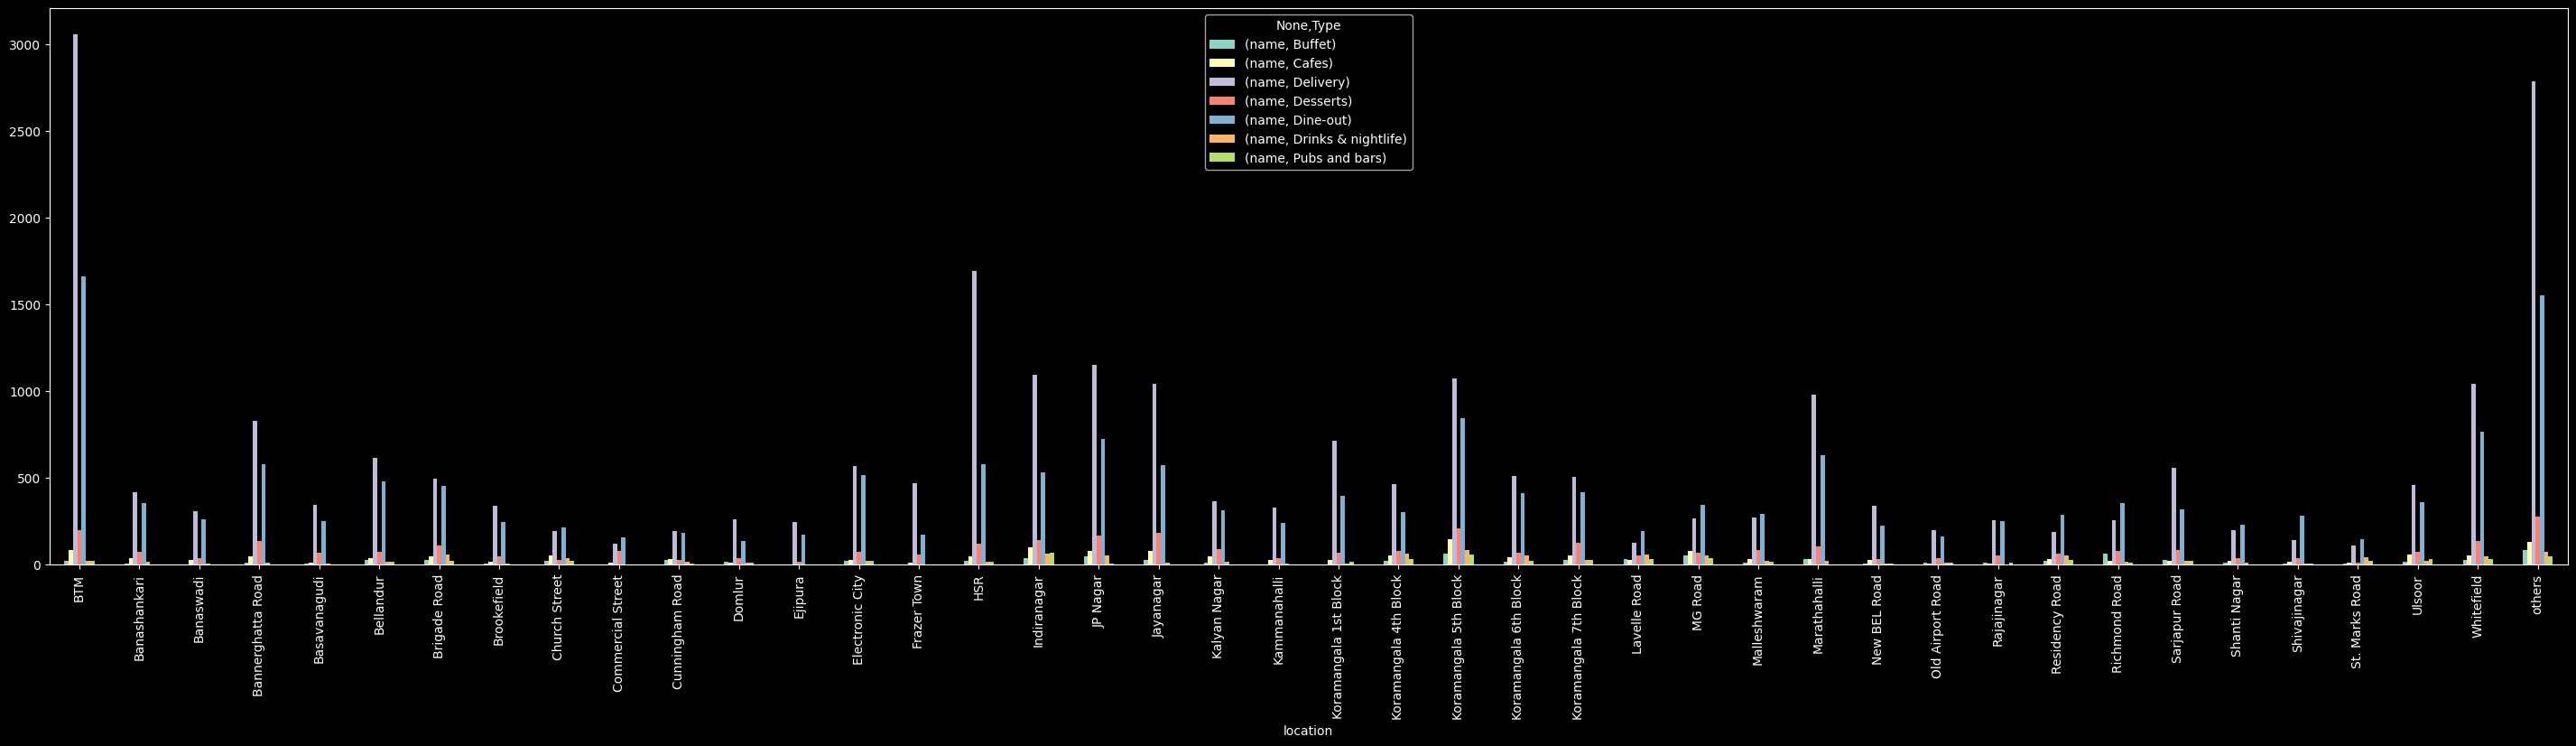

In [35]:
df3.plot(kind = 'bar', figsize=(36,8))


***no of votes , location vise***

In [36]:
df4 = df[['location','votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes' ,ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


In [37]:
df5.shape

(42, 1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining",others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


 ***STATISTICAL TESTINGS*** 

1. Hypothesis Test: Online Order vs Ratings

In [39]:
from scipy import stats

# Split ratings
online = df[df['online_order'] == 'Yes']['rate'].dropna()
offline = df[df['online_order'] == 'No']['rate'].dropna()

# Two-sample t-test
t_stat, p_val = stats.ttest_ind(online, offline, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference: Online order availability impacts ratings.")
else:
    print("❌ No significant difference in ratings between online vs offline.")


T-Statistic: 13.81616737614286
P-Value: 2.488323796415338e-43
✅ Significant difference: Online order availability impacts ratings.


2. Chi-Square Test: Table Booking vs Online Order

In [40]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['book_table'], df['online_order'])
chi2, p, dof, ex = chi2_contingency(contingency)

print("Chi2:", chi2, "P-Value:", p)

if p < 0.05:
    print("✅ Table booking and online ordering are dependent.")
else:
    print("❌ No relationship found between table booking and online ordering.")


Chi2: 0.19305563225843814 P-Value: 0.6603855168117652
❌ No relationship found between table booking and online ordering.


3. ANOVA: Location vs Ratings

In [41]:
from scipy.stats import f_oneway

# Take top 3-5 locations for comparison
top_locations = df['location'].value_counts().nlargest(5).index
anova_data = [df[df['location']==loc]['rate'].dropna() for loc in top_locations]

f_stat, p_val = f_oneway(*anova_data)

print("F-Statistic:", f_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print("✅ Ratings differ significantly across locations.")
else:
    print("❌ No significant difference in ratings by location.")


F-Statistic: 533.5812183346812
P-Value: 0.0
✅ Ratings differ significantly across locations.
